In [10]:
!pip3 install xlrd openpyxl

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 10.7 MB/s            


In [4]:
import findspark
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import DoubleType

In [5]:
df = spark.read.option("header", "true").csv('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_3731569/API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_3731569.csv')

In [6]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[Country Name: string, Country Code: string, Indicator Name: string, Indicator Code: string, 1960: string, 1961: string, 1962: string, 1963: string, 1964: string, 1965: string, 1966: string, 1967: string, 1968: string, 1969: string, 1970: string, 1971: string, 1972: string, 1973: string, 1974: string, 1975: string, 1976: string, 1977: string, 1978: string, 1979: string, 1980: string, 1981: string, 1982: string, 1983: string, 1984: string, 1985: string, 1986: string, 1987: string, 1988: string, 1989: string, 1990: string, 1991: string, 1992: string, 1993: string, 1994: string, 1995: string, 1996: string, 1997: string, 1998: string, 1999: string, 2000: string, 2001: string, 2002: string, 2003: string, 2004: string, 2005: string, 2006: string, 2007: string, 2008: string, 2009: string, 2010: string, 2011: string, 2012: string, 2013: string, 2014: string, 2015: string, 2016: string, 2017: string, 2018: string, 2019: string, 2020: string, _c65:

In [7]:
for i in range(1960, 2021):
    df = df.withColumn(f"num_{str(i)}",col(str(i)).cast(DoubleType()))

In [8]:
", ".join([(f'"num_{str(i)}"') for i in range(1960, 2021)])
    

'"num_1960", "num_1961", "num_1962", "num_1963", "num_1964", "num_1965", "num_1966", "num_1967", "num_1968", "num_1969", "num_1970", "num_1971", "num_1972", "num_1973", "num_1974", "num_1975", "num_1976", "num_1977", "num_1978", "num_1979", "num_1980", "num_1981", "num_1982", "num_1983", "num_1984", "num_1985", "num_1986", "num_1987", "num_1988", "num_1989", "num_1990", "num_1991", "num_1992", "num_1993", "num_1994", "num_1995", "num_1996", "num_1997", "num_1998", "num_1999", "num_2000", "num_2001", "num_2002", "num_2003", "num_2004", "num_2005", "num_2006", "num_2007", "num_2008", "num_2009", "num_2010", "num_2011", "num_2012", "num_2013", "num_2014", "num_2015", "num_2016", "num_2017", "num_2018", "num_2019", "num_2020"'

In [9]:
pydf = df.toPandas()

In [10]:
pydf.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,num_2011,num_2012,num_2013,num_2014,num_2015,num_2016,num_2017,num_2018,num_2019,num_2020
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,None,None,None,None,None,None,...,1342560.0,1381860.0,1406900.0,1436410.0,1436770.0,1457530.0,1471620.0,1478910.0,NaN,NaN


<AxesSubplot:>

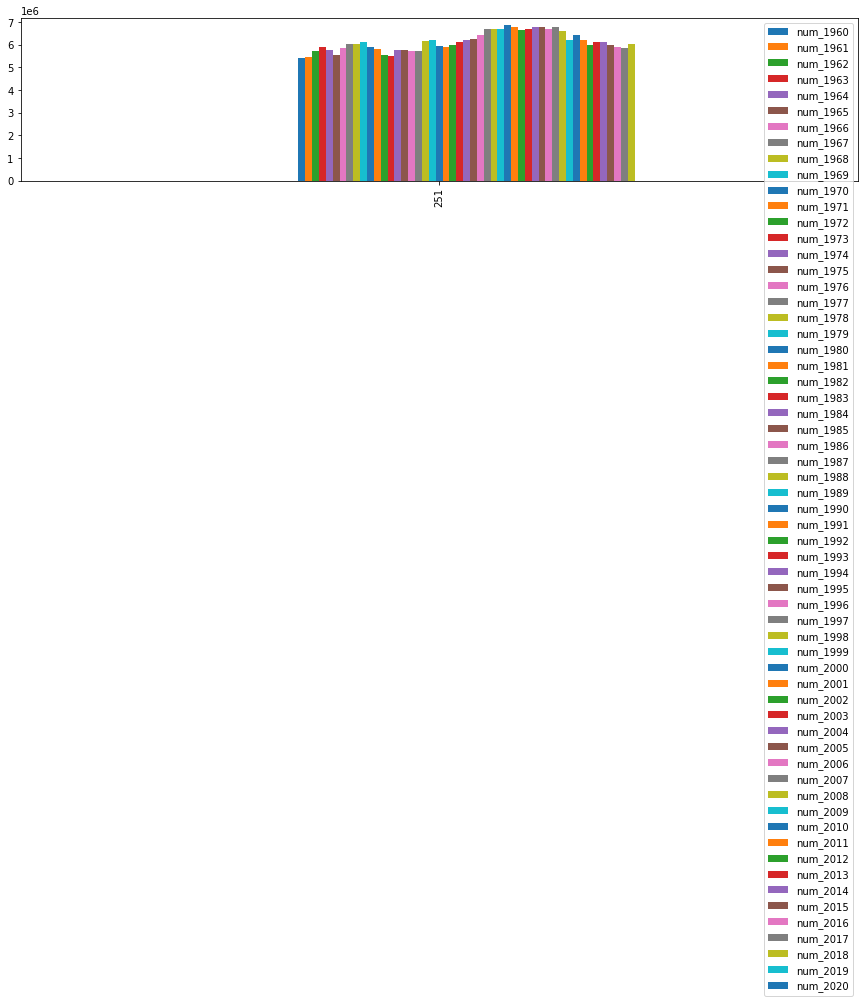

In [11]:
pydf[(pydf['Country Name'] == 'United States') ].plot(kind='bar', figsize=(15, 3))

In [12]:
xls = pd.ExcelFile('Voluntary-Registry-Offsets-Database--v4-2021-year-end.xlsx', engine='openpyxl')

In [13]:
xls.sheet_names

['READ FIRST',
 'PROJECTS',
 'Charts',
 'Map',
 'Table',
 'Credits by Vintage',
 'Column Descriptions',
 'FAQ & Index',
 'ACR Projects',
 'ACR Issuances',
 'ACR Retirements',
 'ACR Cancellations',
 'CAR Projects',
 'CAR Issuances',
 'CAR Retirements',
 'CAR Cancellations',
 'CAR Buffer',
 'Gold Projects',
 'Gold Issuances',
 'Gold Retirements',
 'VCS Projects',
 'VCS Vintage Issuances',
 'VCS Issuances & Retirements',
 'VCS-ARB Projects',
 'ARB Issuances & Retirements',
 'World Regions',
 'Archive']

In [36]:
def readExcelSheet(file_name, sheet_name_value, skip_rows, use_cols):
    try:
        xls_df = pd.read_excel(file_name, sheet_name=sheet_name_value, engine='openpyxl', skiprows=skip_rows, usecols=use_cols )
        #xls_df = pd.read(file_name, sheet_name=sheet_name_value)
        return xls_df
    except:
        print(f"Error reading {sheet_name_value}")
        return None


In [43]:
xls_file_name = 'Voluntary-Registry-Offsets-Database--v4-2021-year-end.xlsx'

In [57]:
vrod_v1_2021 = [
    {
    'sheet_name': 'PROJECTS',
    'data'   : pd.read_excel(
        xls_file_name, 
        sheet_name='PROJECTS', 
        engine='openpyxl', 
        skiprows=3, 
        usecols="A:EK"
      )
},
{
    'sheet_name': 'Column Descriptions',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='Column Descriptions', 
        engine='openpyxl', 
        usecols="A:D"
      )    
},
{
    'sheet_name': 'ACR Projects',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='ACR Projects', 
        engine='openpyxl', 
        usecols="A:O"
      )    
},
{
    'sheet_name': 'ACR Issuances',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='ACR Issuances', 
        engine='openpyxl', 
        usecols="A:S"
      )    
},
{
    'sheet_name': 'ACR Retirements',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='ACR Retirements', 
        engine='openpyxl', 
        usecols="A:Q"
      )    
},
{
    'sheet_name': 'ACR Cancellations',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='ACR Cancellations', 
        engine='openpyxl', 
        usecols="A:R"
      )    
},
{
    'sheet_name': 'CAR Projects',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='CAR Projects', 
        engine='openpyxl', 
        usecols="A:V"
      )    
},
{
    'sheet_name': 'CAR Issuances',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='CAR Issuances', 
        engine='openpyxl', 
        usecols="A:X"
      )    
},
{
    'sheet_name': 'CAR Retirements',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='CAR Retirements', 
        engine='openpyxl', 
        usecols="A:Q"
      )    
},
{
    'sheet_name': 'CAR Cancellations',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='CAR Cancellations', 
        engine='openpyxl', 
        usecols="A:N"
      )    
},
{
    'sheet_name': 'Gold Projects',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='Gold Projects', 
        engine='openpyxl', 
        usecols="A:K"
      )    
},
{
    'sheet_name': 'Gold Issuances',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='Gold Issuances', 
        engine='openpyxl', 
        usecols="A:S"
      )    
},
{
    'sheet_name': 'Gold Retirements',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='Gold Retirements', 
        engine='openpyxl', 
        usecols="A:P"
      )    
},
{
    'sheet_name': 'VCS Projects',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='VCS Projects', 
        engine='openpyxl', 
        usecols="A:M"
      )    
},
{
    'sheet_name': 'VCS Vintage Issuances',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='VCS Vintage Issuances', 
        engine='openpyxl', 
        usecols="A:H"
      )    
},
{
    'sheet_name': 'VCS Issuances & Retirements',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='VCS Issuances & Retirements', 
        engine='openpyxl', 
        usecols="A:Q"
      )    
},
{
    'sheet_name': 'VCS-ARB Projects',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='VCS-ARB Projects', 
        engine='openpyxl', 
        usecols="A:K"
      )    
},
{
    'sheet_name': 'ARB Issuances & Retirements',
    'data'   :pd.read_excel(
        xls_file_name, 
        sheet_name='ARB Issuances & Retirements', 
        engine='openpyxl', 
        usecols="A:AF"
      )    
}
    
]

In [58]:
print(0)

0


In [61]:
vrod_v1_2021[0]['data'].to_json?

In [63]:
a_file = open("data.pkl", "wb")

In [65]:
import pickle

In [66]:
pickle.dump(vrod_v1_2021, a_file)

In [67]:
a_file.close()

In [68]:
with open("data.pkl", "rb") as b_file:
    df2 = output = pickle.load(b_file)

In [70]:
df2[0]['data']

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,2015.3,2016.3,2017.3,2018.3,2019.3,2020.3,2021.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Date added to database
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Cookstoves,Reduction,NaN,Sub Saharan Africa,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,NaN,North America,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,NaN,North America,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
3,ACR104,Ankotrofotsy Community-based Reforestation & C...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,NaN,Sub Saharan Africa,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
4,ACR105,Boa Vista A/R,ACR,No,Completed,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,NaN,South America,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,VCS997,Xinjiang Kaiduhe River Chahan Wusu Hydropower ...,VCS,No,Registered,Renewable Energy,Hydropower,Reduction,ACM0002,East Asia,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
5886,VCS998,01 million Compact Fluorescent Lamps (EVN-2010...,VCS,No,Registered,Household & Community,Lighting,Reduction,AMS-II.J.,South East Asia,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
5887,VCS999,Protection of the Amazon Rain Forest II,VCS,No,Under validation,Forestry & Land Use,REDD+,Mixed,VM0007,South America,...,0,0,0,0,0,0,0,NaN,NaN,v1 4-2021
5888,VCSOPR10,Blue Source – Alford Improved Forest Managemen...,VCS,Yes,Transfer to another GHG program,Forestry & Land Use,Improved Forest Management,Mixed,NaN,North America,...,0,0,0,0,0,97193,0,NaN,Found on Verra OPR registry as 2271,v1 4-2021
